**Step 1: Data Collection**

1. News API to collect stock-related headlines
2. Scraping News Websites: Use tools like *BeautifulSoup* and *Scrapy*
3. Pre-existing Data: platforms like *Kaggle* already contain news headlines

In [48]:
pip install requests beautifulsoup4

**1.1. Fetch HTML Content**

In [49]:
import requests

# URL from FINVIZ
url = "https://www.marketwatch.com/"

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

# Send request to fetch the web page
response = requests.get(url, headers=headers)



# Check the status
if response.status_code == 200:
  print("Request Successful!")
  html_content = response.text # HTML content of the page
else:
  print(f"Request Failed: {response.status_code}")

Request Failed: 401


**Encountered Error**


1.   'Response' object has no attribute 'status'
      - [Solved] using 'status_code'
2. Request Failed 403
      - 403 error typically means that the website is blocking your request, often suspects it's coming from a bot.
      - [Solved] by creating a headers and passing it to the request as headers.




**1.2. Parsing the HTML with BeautifulSoup**

In [50]:
from bs4 import BeautifulSoup

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Print the parsed content to get an idea of the structure
print(soup.prettify())

<!DOCTYPE html>
<html class="dark" lang="en">
 <head>
  <title>
   FINVIZ.com - Stock Screener
  </title>
  <meta charset="utf-8"/>
  <meta content="width=1024" name="viewport"/>
  <meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
  <meta content="3600" http-equiv="Refresh"/>
  <link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
  <script>
   window.notificationsArray = [];
                window.renderScriptNotLoaded = function () {};
                window.handleScriptNotLoaded = function (element) {
                    window.notificationsArray.push(element);
                    window.sentryDisabled = true;
 

**1.3. Locate the New Headlines**

In [51]:
import pandas as pd

In [52]:
# Find the table where the news headlines are located
news_table = soup.find('table', class_='styled-table-new is-rounded is-condensed hp_news-table table-fixed')

# List to store news data
news_data = []


if news_table:
  for row in news_table.find_all('tr', class_='styled-row is-hoverable is-bordered is-rounded cursor-pointer'):
    # Get the time from the second <td>
    time = row.find('td', class_='nn-date text-center').text.strip()
    print(f"\nTime: {time}")

    headline_tag = row.find('a', class_='nn-tab-link')
    print(f"Headline Tag: {headline_tag}")

    if headline_tag:
      headline = headline_tag.text.strip() # Get the headline text
      url = headline_tag['href']
      print(f"Headline: {headline}")
      print(f"Url: {url}")

      # Append the data to the list
      news_data.append({'time': time, 'headline': headline, 'url': url})

  # Convert the list to a DataFrame for better manipulation
  df = pd.DataFrame(news_data)
  df.to_csv("finviz_news_headlines.csv", index=False)
  print("News headlines saved successfully!")
else:
  print("News table not found on the page.")



Time: Oct-12
Headline Tag: <a class="nn-tab-link" href="https://www.bloomberg.com/news/articles/2024-10-12/halloween-is-crunch-time-for-troubled-retailers" rel="nofollow" target="_blank">Troubled Retailers Face a Halloween Crunch With Consumers Spending Less</a>
Headline: Troubled Retailers Face a Halloween Crunch With Consumers Spending Less
Url: https://www.bloomberg.com/news/articles/2024-10-12/halloween-is-crunch-time-for-troubled-retailers

Time: Oct-12
Headline Tag: <a class="nn-tab-link" href="https://finance.yahoo.com/news/how-amazon-changes-local-economies-when-it-moves-in-160028188.html" rel="nofollow" target="_blank">How Amazon changes local economies when it moves in</a>
Headline: How Amazon changes local economies when it moves in
Url: https://finance.yahoo.com/news/how-amazon-changes-local-economies-when-it-moves-in-160028188.html

Time: Oct-12
Headline Tag: None

Time: Oct-12
Headline Tag: <a class="nn-tab-link" href="https://www.reuters.com/markets/asia/maldives-picks-

**Error Encountered:**
1. Could not find the news tables
    - If you manage to find the headlines table, use the table's class

**2. Preprocessing the Headlines**
1. Convert to lowercase
2. Remove punctuation
3. Remove stopwords
4. Lemmatization/Stemming
5. Tokenization

In [53]:
pip install nltk

In [54]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (if running the first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the csv to a DataFrame
df = pd.read_csv("finviz_news_headlines.csv")

# Initialize the Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_headline(headline):
  # Convert to lowercase
  headline = headline.lower()
  print(f"Headline Lowered: {headline}")

  # Remove punctuation and special characters using regex
  headline = re.sub('r[^\w\s]', '', headline)
  print(f"Headline without Punctuations: {headline}")


  # Tokenize the headline
  words = word_tokenize(headline)
  print(f"Token: {words}")


  # Remove the stopwords
  words = [word for word in words if word not in stop_words]
  print(f"Token without stopwords: {words}")


  # Lemmatize each word
  words = [lemmatizer.lemmatize(word) for word in words]
  print(f"Token lemmatized: {words} \n")

  # Join the words into one string
  return ' '.join(words)

# Create a new column called 'preprocessed headline'
df['preprocessed_headline'] = df['headline'].apply(preprocess_headline)

# Display the original and preprocessed values
print(df[['headline', 'preprocessed_headline']].head())

# Save the preprocessed data into a new csv file
df.to_csv("preprocessed_news_headlines.csv", index=False)
print("Preprocessed Headlines saved successfully!")

Headline Lowered: troubled retailers face a halloween crunch with consumers spending less
Headline without Punctuations: troubled retailers face a halloween crunch with consumers spending less
Token: ['troubled', 'retailers', 'face', 'a', 'halloween', 'crunch', 'with', 'consumers', 'spending', 'less']
Token without stopwords: ['troubled', 'retailers', 'face', 'halloween', 'crunch', 'consumers', 'spending', 'less']
Token lemmatized: ['troubled', 'retailer', 'face', 'halloween', 'crunch', 'consumer', 'spending', 'le'] 

Headline Lowered: how amazon changes local economies when it moves in
Headline without Punctuations: how amazon changes local economies when it moves in
Token: ['how', 'amazon', 'changes', 'local', 'economies', 'when', 'it', 'moves', 'in']
Token without stopwords: ['amazon', 'changes', 'local', 'economies', 'moves']
Token lemmatized: ['amazon', 'change', 'local', 'economy', 'move'] 

Headline Lowered: exclusive: maldives picks centerview as debt adviser amid financing cru

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Sentiment Analysis**
1. Rule-Based Sentiment Analysis
    - Use tools like *TextBlob* or *VADER*
    - These tools provide a sentiment score between -1 and +1, where negative scores represent negative sentiment, positive scores represent positive sentiment, and scores close to 0 indicate neutrality.
2. Machine learning-based Sentiment Analysis
    - You can train a model to predict sentiment by using labeled data (positive/neutral/negative labels)
      1. Vectorize text using methods like *TF_IDF* or *Word2Vec*
      2. Use classifiers like Naive Bayes, Logistic Regression or an SVM
      3. You can also use pre-trained model from Hugging Face transformers (like BERT) to predict sentiment

In [55]:
pip install vaderSentiment

In [56]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the preprocessed headliens CSV
df = pd.read_csv("preprocessed_news_headlines.csv")

# Initialize the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def analyze_sentiment(headline):
  # Get the sentiment from VADER
  sentiment = analyzer.polarity_scores(headline)
  return sentiment

# Store the sentiment in a column called 'sentiment'
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Separate the compound score and the sentiment label
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
df['sentiment_label'] = df['compound'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Show the first few rows with sentiment scores
print(df[['headline', 'preprocessed_headline', 'compound', 'sentiment_label']].head())

# Save the DataFrame with sentiment analysis to a csv
df.to_csv("finviz_sentiment_analysis.csv")
print("Sentiment Analysis saved successfully")

                                            headline  \
0  Troubled Retailers Face a Halloween Crunch Wit...   
1  How Amazon changes local economies when it mov...   
2  Exclusive: Maldives picks Centerview as debt a...   
3  Why raising more cash is a smart portfolio mov...   
4  Stock Market News, Oct. 11, 2024: Dow, S&P Hit...   

                               preprocessed_headline  compound sentiment_label  
0  troubled retailer face halloween crunch consum...   -0.4588        negative  
1                   amazon change local economy move    0.1779        positive  
2  exclusive : maldives pick centerview debt advi...   -0.2500        negative  
3  raising cash smart portfolio move — even stock...    0.4019        positive  
4  stock market news , oct. 11 , 2024 : dow , & p...    0.0000         neutral  
Sentiment Analysis saved successfully


**3. Identify Key Sentiment Drivers**



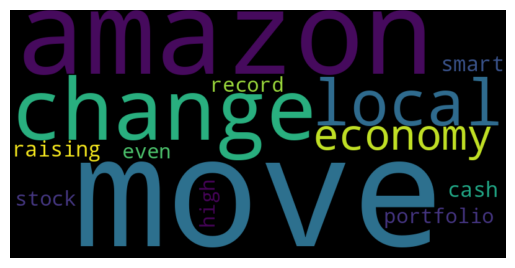

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter headlines with positive sentiment
positive_headlines = df[df['sentiment_label'] == 'positive']['preprocessed_headline']

# Create Word Cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(positive_headlines))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()